In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [163]:
maze =[(2,4),(4,5),(1,5),(5,6),(3,4)]


In [164]:
#  Graph only  visualization

{2: Text(0.09237096481366103, -0.3056239782379805, '2'),
 4: Text(0.3387244956105333, 0.25886181076075737, '4'),
 5: Text(-0.34713185025729315, -0.07800781098244026, '5'),
 1: Text(0.0024864344867836148, -0.8119769024916264, '1'),
 6: Text(-1.0, 0.23133622316121577, '6'),
 3: Text(0.9135499553463152, 0.7054106577900738, '3')}

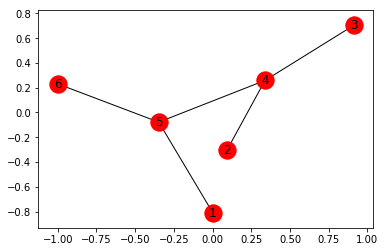

In [165]:
G=nx.Graph()
G.add_edges_from(maze)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

In [166]:
class ReinforcementLearning:
    
    def __init__(self,learning_rate=0.1,gama=0.8,size=6,destination=6,iteration=10):
        self.gama=gama
        self.learning_rate=learning_rate
        # intializing Q and R(Reward table )
        self.Q =np.zeros((size,size))
        # let long the row is state , along the columns is action
        self.R =np.ones((size,size))*-1 
        self.value=0
        self.size=size
        self.destination=destination
        self.iteration=iteration
        print('you have set:: learning_rate={} ,gama={}, size={}, destination={}, iteration {},  \
                              '.format(learning_rate, gama,size,destination,iteration))
    
    # maze is [(2,4),(4,5),(1,5),(5,6),(3,4)] points 
    def fit(self,maze):
        #number of point in graph         
        self.value=[]
        self.update_Reward_matrix(maze)
        for i in range(1,self.iteration):
            intial_state = np.random.randint(low=0,high=self.Q.shape[0],size=1)
            # compute Q for one state
            self.avialable_action(intial_state[0])
            self.value.append(np.sum(self.Q/np.max(self.Q)*100) if np.max(self.Q)>0 else 0 )
        return self.Q/np.max(self.Q)*100
    
    def plot_learning(self):
        plt.plot(self.value)
        
            
    def avialable_action(self,state):
        # First optimal action is moving to final state 
        Available_action = np.where(self.R[state,:]>-1) # 4, 5
        # Q-LEARNING
        for action in Available_action[0]:
            # action by note x to sate y and max(Q(next sate, all actions)
            self.Q[action][state]=(1-self.learning_rate)*(self.R[action][state]) + \
                                    self.learning_rate*(self.R[action][state]+ \
                                    np.max(self.Q[state,:])*self.gama)

    
    def test_optimal_path(self,rate_postion=3):
        # best path
        if rate_postion<=0 or rate_postion>self.size:
            print("position = {} does not exits, change rate_postion".format(rate_postion))
            return
        path =[]
        path.append(rate_postion)
        pre_position =rate_postion
        while rate_postion!=self.destination :
            Avialble_path = self.Q[rate_postion-1,:]
            # next position 
            rate_postion = np.argmax(Avialble_path)+1
            # update path
            path.append(rate_postion)
            if pre_position==rate_postion:
                print("path does not exits")
                break
            pre_position=rate_postion
        return path
    
    def all_path(self):
        for rate_postion in range(self.size):
            print(" From {} to {} is optimal path :: {}".format(rate_postion,self.destination,
                                          self.test_optimal_path(rate_postion)))

    def update_Reward_matrix(self,maze):
        '''
        1) -1 IF NO PATH 
        2) 0 PATH EXITS BUT NOT REACH DESTINATION
        3) 100 IF REACH DESTINATION
        '''
        for point in maze:
            #  path node
            first =point[0]
            second=point[1]

            if second==self.destination:
                self.R[first-1][self.destination-1] =100  # third rule
                self.R[self.destination-1][self.destination-1] =100 # call itself
                self.R[self.destination-1][first-1]=0    # away fromdestination
            else:
                self.R[first-1][second-1] =0  #  secoud  rule
                self.R[second-1][first-1]=0


In [167]:
# default learning rate is 0.1 can set value as need 
RL= ReinforcementLearning(learning_rate=1, gama=0.8, size=6,destination=6,iteration =700)

you have set:: learning_rate=1 ,gama=0.8, size=6, destination=6, iteration 700,                                


In [168]:
RL.fit(maze)

array([[  0.        ,   0.        ,   0.        ,   0.        ,
         80.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  63.99999998,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  63.99999998,
          0.        ,   0.        ],
       [  0.        ,  51.19999999,  51.19999999,   0.        ,
         80.        ,   0.        ],
       [ 63.99999998,   0.        ,   0.        ,  63.99999998,
          0.        , 100.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         80.        , 100.        ]])

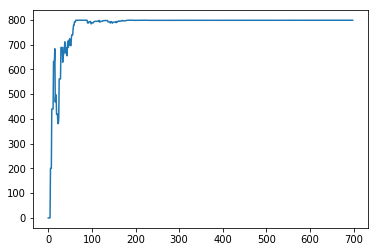

In [169]:
RL.plot_learning()

In [170]:
# test with diff value

In [171]:
rate_postion=1
RL.test_optimal_path(rate_postion)

[1, 5, 6]

In [172]:
RL.all_path()

position = 0 does not exits, change rate_postion
 From 0 to 6 is optimal path :: None
 From 1 to 6 is optimal path :: [1, 5, 6]
 From 2 to 6 is optimal path :: [2, 4, 5, 6]
 From 3 to 6 is optimal path :: [3, 4, 5, 6]
 From 4 to 6 is optimal path :: [4, 5, 6]
 From 5 to 6 is optimal path :: [5, 6]


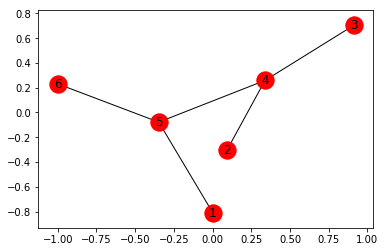

In [173]:
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()